In [121]:
import cv2
import matplotlib.pyplot as plt

In [122]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [123]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [124]:
classLabels = []
fileName = "labels.txt"

with open(fileName, "rt") as fpt:
    classLabels = fpt.read().rstrip("\n").split("\n")

In [125]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [126]:
print(len(classLabels))

80


In [127]:
model.setInputSize(320,320) #size of the frame
model.setInputScale(1.0/127.5) #scale factor of the frame values
model.setInputMean((127.5, 127.5, 127.5)) #mean value of the frame
model.setInputSwapRB(True) #swap first and the last chanels

< cv2.dnn.Model 0x7f14f1d154d0>

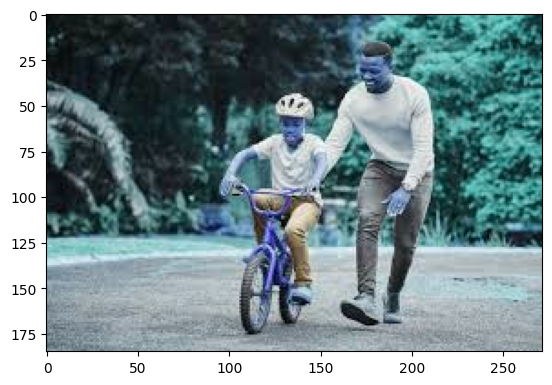

In [128]:
img = cv2.imread("boy.jpeg")
plt.imshow(img)

In [129]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.7)

In [130]:
print(ClassIndex)

[1 1 2]


In [131]:
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN

for ClassIndex, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 1)
    cv2.putText(img, classLabels[ClassIndex-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=1)

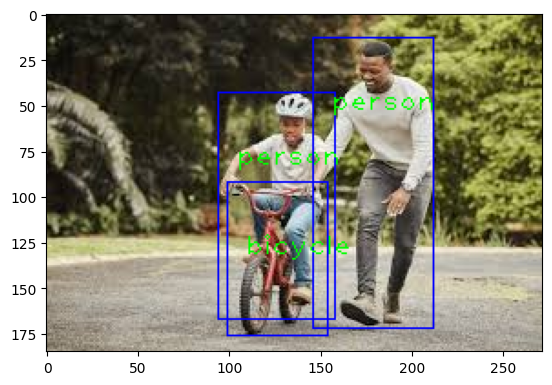

In [132]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [133]:
#Video

"""cap = cv2.VideoCapture("video.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cant open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)

    print(ClassIndex)
    
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

    cv2.imshow("detected", frame)

    if cv2.waitKey(2) & 0xff == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()"""

'cap = cv2.VideoCapture("video.mp4")\nif not cap.isOpened():\n    cap = cv2.VideoCapture(0)\nif not cap.isOpened():\n    raise IOError("Cant open the video")\n\nfont_scale = 3\nfont = cv2.FONT_HERSHEY_PLAIN\n\nwhile True:\n    ret, frame = cap.read()\n\n    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)\n\n    print(ClassIndex)\n    \n    if(len(ClassIndex) != 0):\n        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):\n            if ClassInd <= 80:\n                cv2.rectangle(frame, boxes, (255, 0, 0), 2)\n                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)\n\n    cv2.imshow("detected", frame)\n\n    if cv2.waitKey(2) & 0xff == ord("q"):\n        break\ncap.release()\ncv2.destroyAllWindows()'

In [134]:
#CAMERA

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cant open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)

    print(ClassIndex)
    
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

    cv2.imshow("detected", frame)

    if cv2.waitKey(2) & 0xff == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()


[ WARN:0@11302.050] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ERROR:0@11302.169] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
()
[1]
[1]
[1]
[1]
[1]
()
[1]
[1]
[1]
[1]
()
[1]
()
[1]
()
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 84]
[1]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[84  1]
[1]
[1]
[ 1 84]
[1]
[1]
[84  1]
[84  1]
[84  1]
[ 1 84 44]
[1]
[1]
[1]
[ 1 44]
[44  1 44]
[1]
[ 1 84 44]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84 84]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 44]
[1]
[1]
[ 1 44]
[ 1 44]
[1]
[1]
[1]
[84  1]
()
[ 1 44]
[1]
()
[1]
[ 1 44]
[1]
[ 1 84]
[1]
[ 1 84]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 44]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 44]
[1 1]
[ 1  1 44]
[ 1 44]
[1 1]
[1 1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[44  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 44]
[ 1 44]
[ 1 44]
[1]
